In [367]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [368]:
df = pd.read_csv('D:/mlproject/notebook/data/raw.csv')

In [369]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [370]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [371]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [372]:
df.duplicated().sum()

1

In [373]:
df.shape

(1338, 7)

In [374]:
df.drop_duplicates(inplace = True)
df.shape

(1337, 7)

In [375]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

###Data Visualisation

<Axes: xlabel='bmi', ylabel='charges'>

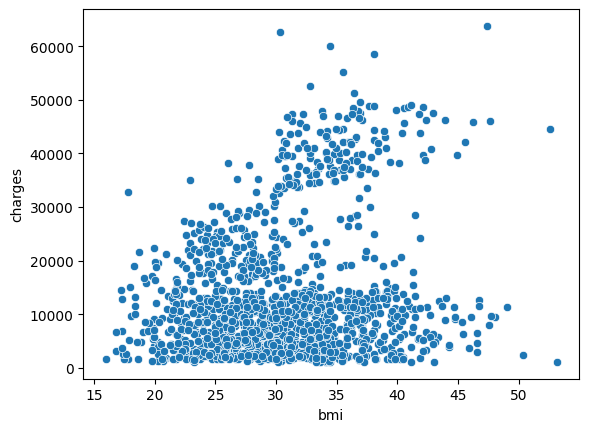

In [376]:
sns.scatterplot(x=df['bmi'], y=df['charges'])

<Axes: xlabel='bmi', ylabel='charges'>

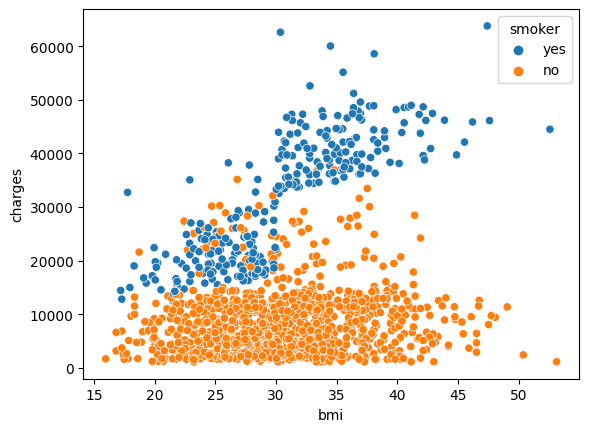

In [377]:
sns.scatterplot(x=df['bmi'], y=df['charges'], hue = df['smoker'])

<Axes: xlabel='bmi', ylabel='charges'>

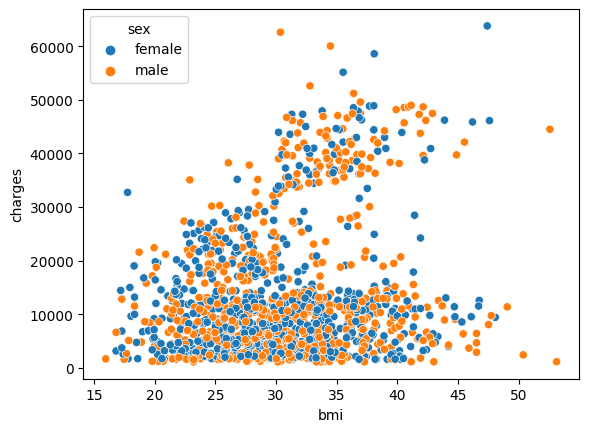

In [378]:
sns.scatterplot(x=df['bmi'], y=df['charges'], hue = df['sex'])

<Axes: xlabel='bmi', ylabel='charges'>

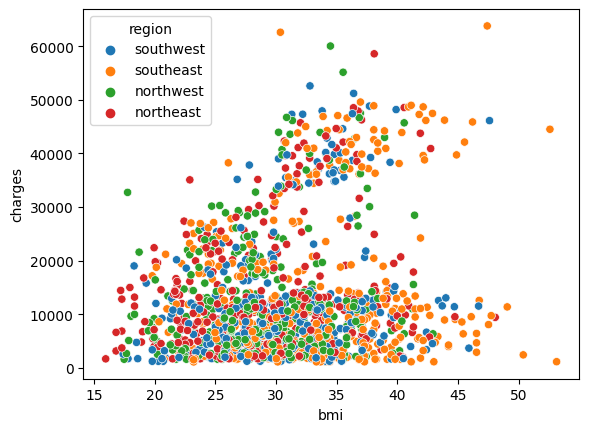

In [379]:
sns.scatterplot(x=df['bmi'], y=df['charges'], hue = df['region'])

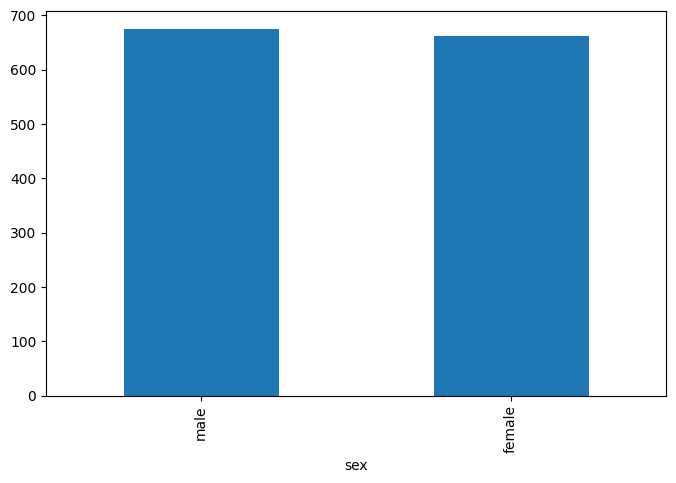

In [380]:
gender_variation = df['sex'].value_counts()
gender_variation.plot(kind='bar',figsize=(8,5))
plt.show()

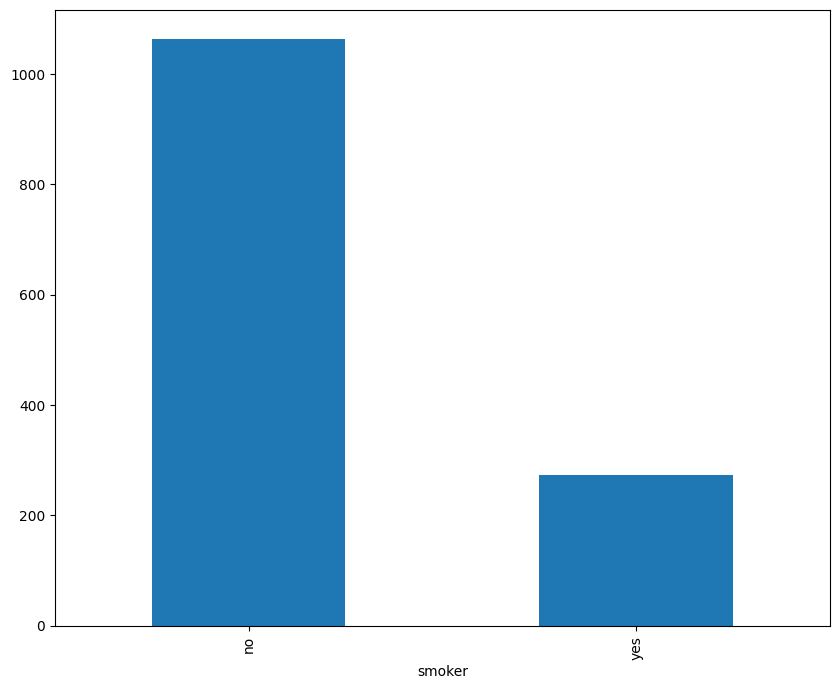

In [381]:
smoker = df['smoker'].value_counts()
smoker.plot(kind='bar',figsize=(10,8))
plt.show()

In [382]:
X = df.drop(columns=['charges'],axis=1)
y = df['charges']

In [383]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [384]:
# le = LabelEncoder()
# df['region'] = le.fit_transform(df['region'])
# df.head()
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns
print(num_features)
print(cat_features)

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

Index(['age', 'bmi', 'children'], dtype='object')
Index(['sex', 'smoker', 'region'], dtype='object')


In [385]:
# le = LabelEncoder()
# df['smoker'] = le.fit_transform(df['smoker'])
# df.head()
X = preprocessor.fit_transform(X)

In [386]:
# le = LabelEncoder()
# df['sex'] = le.fit_transform(df['sex'])
# df.head()

<Axes: >

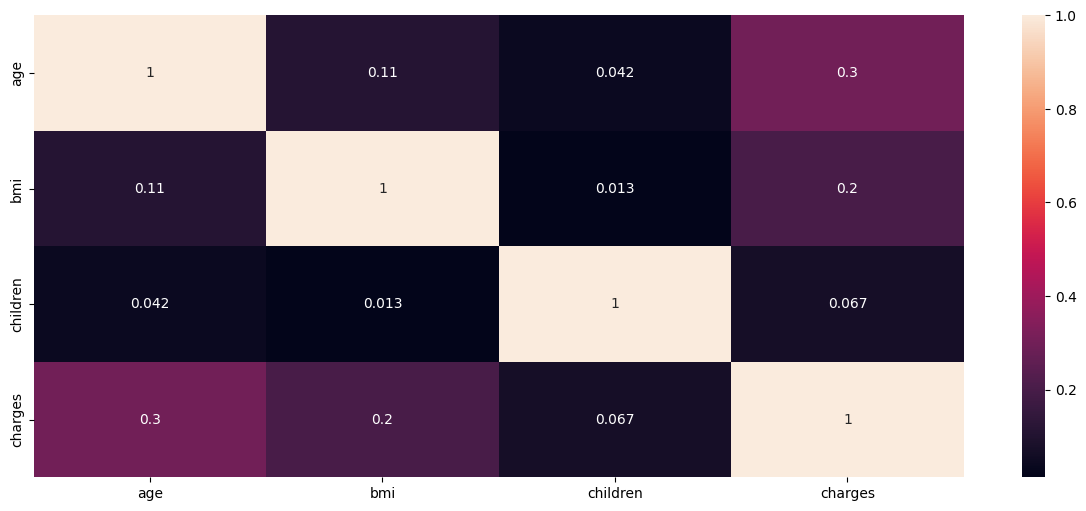

In [387]:
corrM = df.corr(numeric_only = True)
plt.figure(figsize = (15,6))
sns.heatmap(corrM, annot = True)

<Axes: >

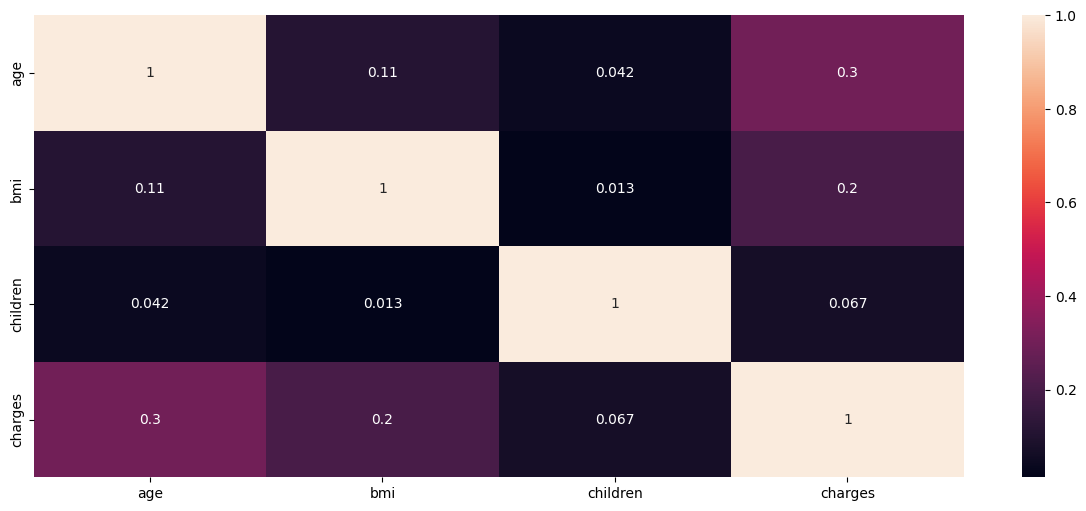

In [388]:
corrM = df.corr(numeric_only = True)
plt.figure(figsize = (15,6))
sns.heatmap(corrM, annot = True)

In [389]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [390]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


Smoker,BMI, Age have significant correlation with charges

In [391]:
from sklearn.model_selection import train_test_split

In [392]:
# df = df.drop('bmi', axis = 1)

In [393]:
# X.head()

In [394]:
# X =  df.drop('charges', axis=1)
# y = df['charges']

In [395]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

# Linear Regression


In [396]:
from sklearn.linear_model import LinearRegression

In [397]:
from sklearn.metrics import mean_squared_error

In [398]:
lr = LinearRegression()

In [399]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [400]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
rmse = math.sqrt(mean_squared_error(y_pred, y_test))
print(lr.score(X_test, y_test))
print(rmse)

0.8069287081198013
5956.342894363586


In [401]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
# from catboost import CatBoostRegressor
from xgboost import XGBRegressor

# Ridge Regression


In [402]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 1)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
rmse = math.sqrt(mean_squared_error(y_pred, y_test))
print(ridge.score(X_test, y_test))
print(rmse)

0.806413721728274
5964.281394063946


# Lasso Regression



In [403]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
rmse = math.sqrt(mean_squared_error(y_pred, y_test))
print(lasso.score(X_test, y_test))
print(rmse)

0.8068461126668398
5957.616813003289


# Random Forest Regressor


In [404]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
rmse = math.sqrt(mean_squared_error(y_pred, y_test))
print(rfr.score(X_test, y_test))
print(rmse)

0.883683403384139
4623.189372801732


# Gradient Boosting Regression

In [405]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
rmse = math.sqrt(mean_squared_error(y_pred, y_test))
print(gbr.score(X_test, y_test))
print(rmse)

0.9006662659480448
4623.189372801732


# XGBOOST

In [406]:
import xgboost as xg
xgb_r = xg.XGBRegressor(objective ='reg:squarederror', booster='gbtree',n_estimators = 20, eta = 0.25, max_depth = 3)
xgb_r.fit(X_train, y_train)
y_pred = xgb_r.predict(X_test)
rmse = math.sqrt(mean_squared_error(y_pred, y_test))
print(xgb_r.score(X_test, y_test))
print(rmse)

0.9045637301049351
4187.719346217126


In [407]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [408]:
# pip install catboost

In [409]:
from catboost import CatBoostRegressor

In [419]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(max_depth = 5,max_leaf_nodes=35,n_estimators = 30, ),
    "XGBRegressor": XGBRegressor(objective ='reg:squarederror', booster='gbtree',n_estimators = 25, eta = 0.3, max_depth = 5),
    "CatBoosting Regressor": CatBoostRegressor(learning_rate= 0.04044895113884879, depth= 2, subsample= 0.14950610661577773, colsample_bylevel= 0.23356794485493942, min_data_in_leaf= 43,verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor(),
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 6081.1069
- Mean Absolute Error: 4181.9015
- R2 Score: 0.7299
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5956.3429
- Mean Absolute Error: 4177.0456
- R2 Score: 0.8069


Lasso
Model performance for Training set
- Root Mean Squared Error: 6081.1094
- Mean Absolute Error: 4182.0049
- R2 Score: 0.7299
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5957.6168
- Mean Absolute Error: 4177.8549
- R2 Score: 0.8068


Ridge
Model performance for Training set
- Root Mean Squared Error: 6081.1697
- Mean Absolute Error: 4185.9334
- R2 Score: 0.7299
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5964.2814
- Mean Absolute Error: 4185.4016
- R2 Score: 0.8064


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 4825.7626
- Mean Absolute Error: 2905.7582


In [411]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,CatBoosting Regressor,0.900856
6,XGBRegressor,0.900202
5,Random Forest Regressor,0.898834
8,AdaBoost Regressor,0.872192
0,Linear Regression,0.806929
1,Lasso,0.806846
2,Ridge,0.806414
4,Decision Tree,0.790412
3,K-Neighbors Regressor,0.782780


In [412]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
900,8688.85885,10823.269531,-2134.410681
1064,5708.86700,7755.604492,-2046.737492
1256,11436.73815,12319.122070,-882.383920
298,38746.35510,39219.679688,-473.324587
237,4463.20510,6874.506348,-2411.301248
...,...,...,...
534,13831.11520,14368.134766,-537.019566
542,13887.20400,14342.704102,-455.500102
760,3925.75820,6835.655273,-2909.897073
1284,47403.88000,48695.214844,-1291.334844


In [413]:
from catboost import CatBoostRegressor
cb = CatBoostRegressor(learning_rate= 0.04044895113884879, depth= 2, subsample= 0.14950610661577773, colsample_bylevel= 0.23356794485493942, min_data_in_leaf= 43,verbose=False)
cb.fit(X_train, y_train)
y_pred = cb.predict(X_test)
rmse = math.sqrt(mean_squared_error(y_pred, y_test))
print(cb.score(X_test, y_test))
print(rmse)

0.9008557431490136
4268.296898203902


In [414]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
900,8688.85885,9702.787922,-1013.929072
1064,5708.86700,8022.028092,-2313.161092
1256,11436.73815,14200.793004,-2764.054854
298,38746.35510,37449.356442,1296.998658
237,4463.20510,6194.579382,-1731.374282
...,...,...,...
534,13831.11520,14259.780807,-428.665607
542,13887.20400,14907.789237,-1020.585237
760,3925.75820,7703.195900,-3777.437700
1284,47403.88000,48308.450355,-904.570355


In [415]:
# pip install optuna

In [416]:
# import xgboost as xg
# from sklearn.metrics import mean_squared_error
# import optuna

# def objective(trial,data=X,target=y):
#     train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.15,random_state=42)
#     param = {
#         # 'tree_method':'gpu_hist',  # this parameter means using the GPU when training our model to speedup the training process
#         'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
#         'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
#         'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
#         'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
#         'learning_rate': trial.suggest_categorical('learning_rate', [0.008,0.01,0.012,0.014,0.016,0.018, 0.02]),
#         'n_estimators': trial.suggest_categorical('n_estimators', [5, 7, 9, 10, 12, 15, 20, 25, 30]),
#         'max_depth': trial.suggest_categorical('max_depth', [5,7,9,11,13,15,17]),
    #     'random_state': trial.suggest_categorical('random_state', [2020]),
    #     'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
    # }
    # model = xg.XGBRegressor(**param)  
    
    # model.fit(train_x,train_y,eval_set=[(test_x,test_y)],early_stopping_rounds=100,verbose=False)
    # preds = model.predict(test_x)
    
    # rmse = mean_squared_error(test_y, preds,squared=False)
    
    # return rmse

In [417]:
# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=30)
# print('Number of finished trials:', len(study.trials))
# print('Best trial:', study.best_trial.params)